In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


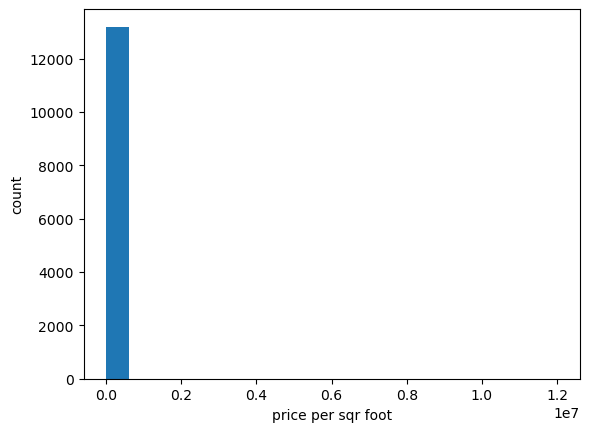

In [7]:
plt.xlabel("price per sqr foot")
plt.ylabel("count")
plt.hist(df.price_per_sqft, bins=20)
plt.show()

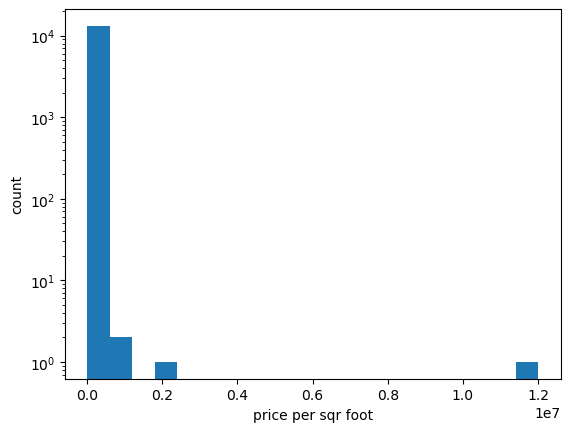

In [8]:
plt.xlabel("price per sqr foot")
plt.ylabel("count")
plt.hist(df.price_per_sqft, bins=20)
plt.yscale('log')
plt.show() 

In [9]:
lower_bound, upper_bound = df.price_per_sqft.quantile([0.001,0.999])
lower_bound, upper_bound

(1366.184, 50959.36200000098)

In [13]:
outliers = df[(df.price_per_sqft > upper_bound) | (df.price_per_sqft < lower_bound)]
outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [15]:
outliers.shape

(28, 7)

In [16]:
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
798,other,4 Bedroom,10961.0,4.0,80.0,4,729


## Remove outliers

In [17]:
new_df = df[(df.price_per_sqft > lower_bound) & (df.price_per_sqft<upper_bound)]
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [18]:
new_df.shape

(13172, 7)

In [19]:
df.shape

(13200, 7)

 ## Remove outliers using 4 std

In [20]:
mean = new_df.price_per_sqft.mean()
mean

6663.6537351958705

In [21]:
std = new_df.price_per_sqft.std()
std

4141.020700174605

### use of 4 std 

In [22]:
max_lim = mean + 4 * std
min_lim = mean - 4 * std

max_lim , min_lim

(23227.73653589429, -9900.429065502549)

In [24]:
df3 = df[(df.price_per_sqft > min_lim) & (df.price_per_sqft < max_lim)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [25]:
new_df.shape

(13172, 7)

In [26]:
df3.shape

(13061, 7)

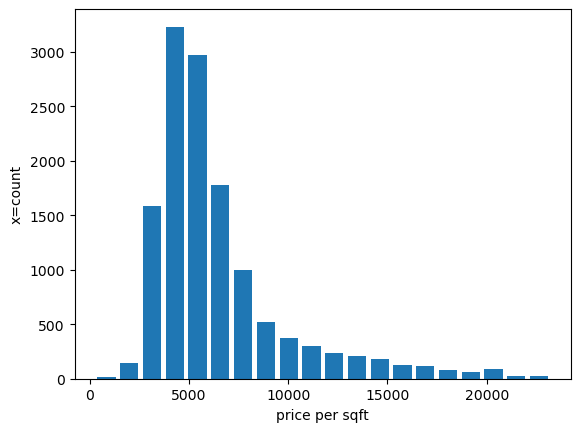

In [29]:
plt.xlabel("price per sqft")
plt.ylabel("x=count")
plt.hist(df3.price_per_sqft, bins = 20, rwidth=0.8)
plt.show()

In [30]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


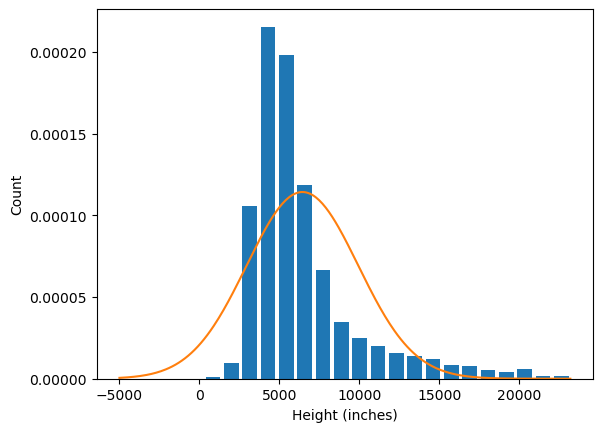

In [35]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### Remove Outlier using zscore

In [41]:
new_df["zscore"] = (new_df.price_per_sqft - new_df.price_per_sqft.mean()) / new_df.price_per_sqft.std()
new_df.sample(5)

C:\Users\Aakash\AppData\Local\Temp\ipykernel_7944\3177504258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["zscore"] = (new_df.price_per_sqft - new_df.price_per_sqft.mean()) / new_df.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10579,KR Puram,2 BHK,1035.0,2.0,40.0,2,3864,-0.676078
3739,Thubarahalli,2 BHK,975.0,2.0,55.0,2,5641,-0.246957
2748,Margondanahalli,2 Bedroom,1200.0,1.0,53.0,2,4416,-0.542778
7266,Kalena Agrahara,2 BHK,1040.0,2.0,45.0,2,4326,-0.564511
4294,Kanakpura Road,2 BHK,1080.0,2.0,37.8,2,3499,-0.764221


In [42]:
outliers_z = new_df[(new_df.zscore < -4) | (new_df.zscore > 4)]
outliers_z.shape

(125, 8)

In [43]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333,5.232851
2258,other,4 Bedroom,3200.0,4.0,1200.0,4,37500,7.446557
11661,other,4 Bedroom,1200.0,4.0,375.0,4,31250,5.937267
3340,other,19 BHK,2000.0,16.0,490.0,19,24500,4.307234
6135,other,3 Bedroom,4273.0,3.0,1100.0,3,25743,4.607402


In [45]:
df3 = new_df[(new_df.zscore > -4) | (new_df.zscore < 4)]
df3.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9551,Uttarahalli,2 BHK,1065.0,2.0,42.60,2,4000,-0.643236
8112,Kadubeesanahalli,3 BHK,1424.0,2.0,75.00,3,5266,-0.337514
4128,other,3 BHK,1645.0,3.0,95.00,3,5775,-0.214598
2873,Vijayanagar,3 Bedroom,1000.0,3.0,140.00,3,14000,1.771628
12923,Kumaraswami Layout,2 BHK,1081.0,2.0,60.00,2,5550,-0.268932
11869,Electronic City,2 BHK,1190.0,2.0,42.00,2,3529,-0.756976
11664,other,2 Bedroom,660.0,2.0,76.00,2,11515,1.171534
9607,Raja Rajeshwari Nagar,2 BHK,1295.0,2.0,55.47,2,4283,-0.574895
10948,other,3 BHK,1305.0,2.0,45.68,3,3500,-0.763979
9274,other,3 BHK,1504.0,3.0,67.00,3,4454,-0.533601


In [47]:
new_df.shape[0] - df3.shape[0]

0